# Project
## Stackoverflow 2019 annual survey

Importation of libraries

In [262]:
import csv
import random
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

np.set_printoptions(suppress=True)

Data formating function

In [263]:
tmp = set()
def data_tester(x):
    if x not in tmp:
        print(x)
        tmp.add(x)

def int_parser(x):
    try:
        return int(float(x))
    except:
        return None

class OS(Enum):
    WINDOWS = 1
    LINUX = 2
    MACOS = 3
    BSD = 4

def os_parser(x):
    try:
        if x.upper() == 'LINUX-BASED':
            return OS.LINUX
        else: 
            return OS[x.upper()]
    except:
        return None
def judgement_parser(x):
    if x == 'Far below average':
        return 0
    elif x == 'A little below average':
        return 1
    elif x == 'Average':
        return 2
    elif x == 'A little above average':
        return 3
    elif x == 'Far above average':
        return 4
    else:
        return None

def satisfaction_parser(x):
    if x == 'Very dissatisfied':
        return 0
    elif x == 'Slightly dissatisfied':
        return 1
    elif x == 'Neither satisfied nor dissatisfied':
        return 2
    elif x == 'Slightly satisfied':
        return 3
    elif x == 'Very satisfied':
        return 4
    else:
        return None

class Binary(Enum):
    NO = 0
    YES = 1

def binary_parser(x):
    try:
        return Binary[x.upper()]
    except:
        return None

class JobType(Enum):
    FULL_TIME = 1
    PART_TIME = 2
    INDEPENDENT = 3
    LOOK_FOR_WORK = 4
    UNEMPLOYED = 5
    RETIRED = 6

def job_parser(x):
    if x == 'Employed full-time':
        return JobType.FULL_TIME
    elif x == 'Employed part-­time':
        return JobType.PART_TIME
    elif x == 'Independent contractor, freelancer, or self-employed':
        return JobType.INDEPENDENT
    elif x == 'Not employed, and not looking for work':
        return JobType.UNEMPLOYED
    elif x == 'Not employed, but looking for work':
        return JobType.UNEMPLOYED
    elif x == 'Retired':
        return JobType.RETIRED
    else:
        return None

data_parser = {
    'Age' : int_parser,
    'Age1stCode' : int_parser,
    'OpSys' : os_parser,
    'BetterLife' : binary_parser,
    'Extraversion' : binary_parser,
    'ITperson' : binary_parser,
    'WorkWeekHrs' : int_parser,
    'ImpSyn' : judgement_parser,
    'ConvertedComp' : int_parser,
    'Employment' : job_parser,
    'YearsCode' : int_parser,
    'YearsCodePro' : int_parser,
    'JobSat' : satisfaction_parser,
}

Data importation

In [264]:
file = 'survey_results_public.csv'
data = None
with open(file, 'r') as csvfile:
    table = csv.DictReader(csvfile, delimiter=',')
    table = list(table)
    print(len(table))
    data = {
            key: [
                    data_parser[key](row[key])
                    for row in table
                ]
            for key in data_parser
        }

88883


Distribution of some variables

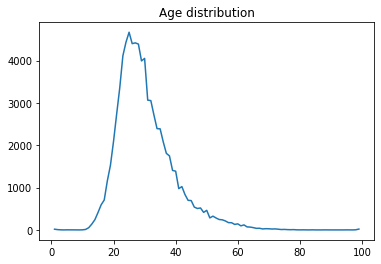

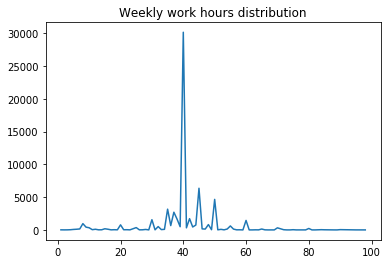

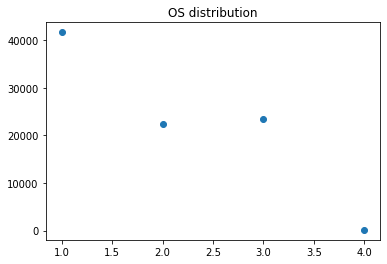

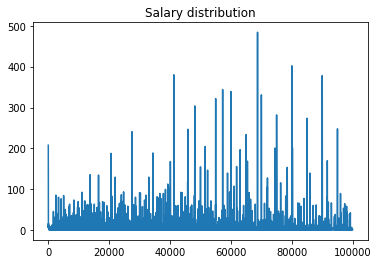

In [265]:
age_distribution = np.array([[x,data['Age'].count(x)] for x in set(data['Age']) if x is not None])
plt.figure()
plt.title('Age distribution')
plt.plot(age_distribution[:, 0], age_distribution[:, 1])

weekly_hours_distribution = np.array([[x,data['WorkWeekHrs'].count(x)] for x in set(data['WorkWeekHrs']) if x is not None and x < 100])
plt.figure()
plt.title('Weekly work hours distribution')
plt.plot(weekly_hours_distribution[:, 0], weekly_hours_distribution[:, 1])

os_distribution = [
    [x.value, data['OpSys'].count(x)]
    for x in set(data['OpSys']) if x is not None
]
os_distribution.sort(key=lambda x: x[0])
os_distribution = np.array(os_distribution)
plt.figure()
plt.title('OS distribution')
plt.scatter(os_distribution[:, 0], os_distribution[:, 1])

salary_distribution = [(float(x) // 10) * 10 for x in data['ConvertedComp'] if x is not None]
salary_distribution = [[x,salary_distribution.count(x)] for x in set(salary_distribution) if x is not None and x < 100000]
salary_distribution.sort(key=lambda x: x[0])
salary_distribution = np.array(salary_distribution)
plt.figure()
plt.title('Salary distribution')
plt.plot(salary_distribution[:, 0], salary_distribution[:, 1])

Correlation between variables

In [266]:
# data_array = [[x for x in data[key]] for key in data]
# data_array = [[y if isinstance(y, int) else y.value for y in x] for x in data_array if x.count(None) == 0]
data_array = [
    [a, b, c, d, e, f, g, h]
    for a, b, c, d, e, f, g, h in zip(
        data['Age'],
        data['Age1stCode'],
        data['WorkWeekHrs'],
        data['ConvertedComp'],
        data['YearsCode'],
        data['YearsCodePro'],
        data['JobSat'],
        data['ImpSyn']
        )
    if 
        a is not None 
        and b is not None 
        and c is not None 
        and d is not None 
        and e is not None 
        and f is not None
        and g is not None
        and h is not None
]

data_array = np.array(data_array)
data_array = data_array.transpose()
np.corrcoef(data_array)

array([[ 1.  , -0.01,  0.01,  0.11,  0.79,  0.83,  0.01,  0.12],
       [-0.01,  1.  , -0.  , -0.04, -0.34, -0.18, -0.04, -0.12],
       [ 0.01, -0.  ,  1.  ,  0.01,  0.01,  0.01,  0.  ,  0.01],
       [ 0.11, -0.04,  0.01,  1.  ,  0.1 ,  0.1 ,  0.04,  0.05],
       [ 0.79, -0.34,  0.01,  0.1 ,  1.  ,  0.87,  0.04,  0.2 ],
       [ 0.83, -0.18,  0.01,  0.1 ,  0.87,  1.  ,  0.03,  0.19],
       [ 0.01, -0.04,  0.  ,  0.04,  0.04,  0.03,  1.  ,  0.11],
       [ 0.12, -0.12,  0.01,  0.05,  0.2 ,  0.19,  0.11,  1.  ]])

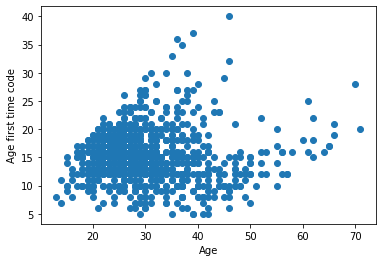

In [267]:
age_mat = [
    [x, y] 
    for x, y in zip(data['Age'], data['Age1stCode'])
    if x is not None and y is not None and x > 10 and x < 80 and x >= y
]

age_mat = np.array(random.sample(age_mat, 1000))
plt.xlabel('Age')
plt.ylabel('Age first time code')
plt.scatter(age_mat[:,0], age_mat[:, 1])

# Z = linkage(age_mat, 'single') d = dendrogram(Z) plt.show()

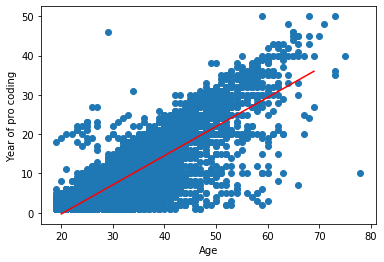

In [302]:
pro_mat = [
    [x, y] 
    for x, y in zip(data['Age'], data['YearsCodePro'])
    if x is not None and y is not None and x > 18 and x < 80
]

pro_mat = np.array(random.sample(pro_mat, 10000))
plt.scatter(pro_mat[:,0], pro_mat[:, 1])
slope, intercept, r_value, p_value, std_err = stats.linregress(pro_mat)
plt.xlabel('Age')
plt.ylabel('Year of pro coding')
plt.plot(range(20,70), [intercept + x * slope for x in range(20,70)], 'r')

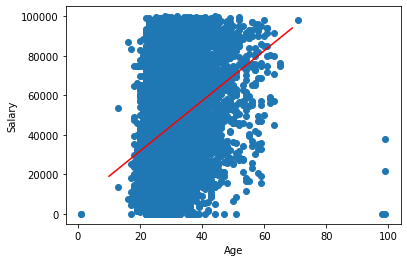

In [303]:
salary_age = [
    [x, y] 
    for x, y, z in zip(data['Age'], data['ConvertedComp'], data['Employment'])
    if x is not None and y is not None and z == JobType.FULL_TIME and y < 100000
]

# salary_age = np.array(salary_age)
salary_age = np.array(random.sample(salary_age, 10000))
plt.scatter(salary_age[:, 0], salary_age[:, 1])
slope, intercept, r_value, p_value, std_err = stats.linregress(salary_age)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.plot(range(10,70), [intercept + x * slope for x in range(10,70)], 'r')

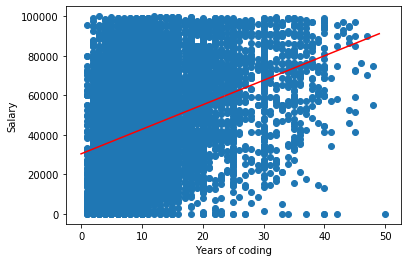

In [270]:
salary_code = [
    [x, y] 
    for x, y, z in zip(data['YearsCode'], data['ConvertedComp'], data['Employment'])
    if x is not None and y is not None and z == JobType.FULL_TIME and y < 100000
]

salary_code = np.array(random.sample(salary_code, 10000))
# salary_code = np.array(salary_code)
plt.scatter(salary_code[:, 0], salary_code[:, 1])
slope, intercept, r_value, p_value, std_err = stats.linregress(salary_code)

plt.xlabel('Years of coding')
plt.ylabel('Salary')
plt.plot(range(0,50), [intercept + x * slope for x in range(0,50)], 'r')

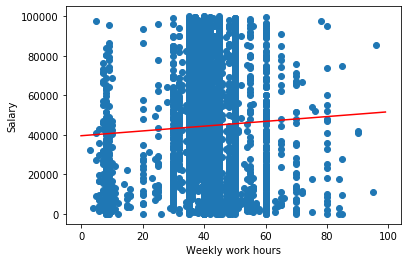

In [307]:
salary_hour = [
    [x, y] 
    for x, y, z in zip(data['WorkWeekHrs'], data['ConvertedComp'], data['Employment'])
    if x is not None and y is not None and z == JobType.FULL_TIME and x < 100 and y < 100000
]

salary_hour = np.array(random.sample(salary_hour, 10000))
plt.scatter(salary_hour[:, 0], salary_hour[:, 1])
slope, intercept, r_value, p_value, std_err = stats.linregress(salary_hour)
plt.xlabel('Weekly work hours')
plt.ylabel('Salary')
plt.plot(range(0,100), [intercept + x * slope for x in range(0,100)], 'r')

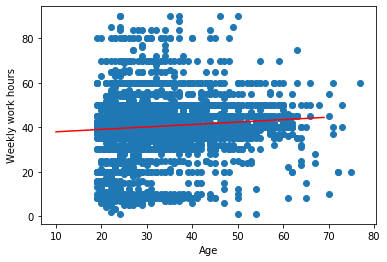

In [272]:
work_mat = [
    [x, y] 
    for x, y in zip(data['Age'], data['WorkWeekHrs'])
    if x is not None and y is not None and y < 100 and x < 80 and x > 18
]

work_mat = np.array(random.sample(work_mat, 10000))
plt.scatter(work_mat[:,0], work_mat[:, 1])
slope, intercept, r_value, p_value, std_err = stats.linregress(work_mat)
plt.xlabel('Age')
plt.ylabel('Weekly work hours')
plt.plot(range(10,70), [intercept + x * slope for x in range(10,70)], 'r')

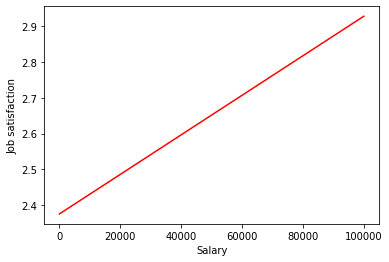

In [281]:
thune_sat = [
    [x, y]
    for x, y in zip(data['ConvertedComp'], data['JobSat'])
    if x is not None and y is not None and x < 100000
]

thune_sat = np.array(random.sample(thune_sat, 10000))
# plt.scatter(thune_sat[:,0], thune_sat[:, 1])
slope, intercept, r_value, p_value, std_err = stats.linregress(thune_sat)
plt.xlabel('Salary')
plt.ylabel('Job satisfaction')
plt.plot(range(0,100000), [intercept + x * slope for x in range(0,100000)], 'r')

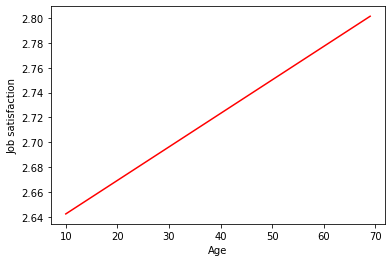

In [282]:
age_sat = [
    [x, y] 
    for x, y in zip(data['Age'], data['JobSat'])
    if x is not None and y is not None and x > 18 and x < 80
]

age_sat = np.array(random.sample(age_sat, 10000))
# plt.scatter(age_sat[:,0], age_sat[:, 1])
slope, intercept, r_value, p_value, std_err = stats.linregress(age_sat)
plt.xlabel('Age')
plt.ylabel('Job satisfaction')
plt.plot(range(10,70), [intercept + x * slope for x in range(10,70)], 'r')

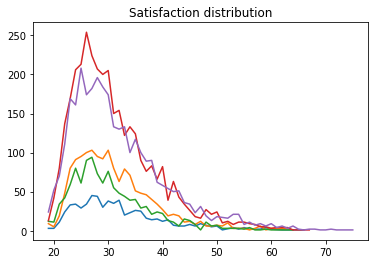

In [283]:
plt.title('Satisfaction distribution')
for i in range(0, 5):
    tmp = [x[0] for x in age_sat if x[1] == i]
    nb = np.array([[x, tmp.count(x)] for x in set(tmp)])
    plt.plot(nb[:, 0], nb[:, 1])

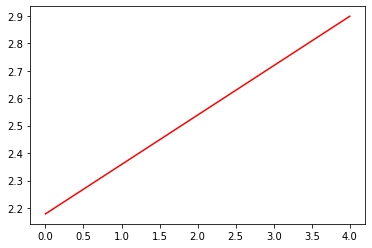

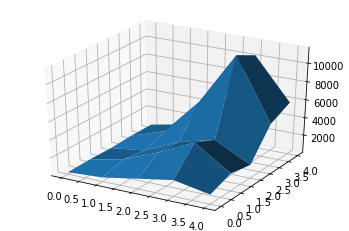

In [276]:
jug_sat = [
    [x, y]
    for x, y in zip(data['ImpSyn'], data['JobSat'])
    if x is not None and y is not None
]

dataX = list(set([x for x in data['ImpSyn'] if x is not None]))
dataY = list(set([x for x in data['JobSat'] if x is not None]))

X, Y = np.meshgrid(np.array(dataX), np.array(dataY))
Z = np.zeros_like(X)

unique, counts = np.unique(jug_sat, return_counts=True, axis=0)

for i, x in enumerate(dataX):
    for j, y in enumerate(dataY):
        for k, z in enumerate(unique):
            if z[0] == x and z[1] == y:
                np.put(Z, i + j * len(dataX), counts[k])

jug_sat = np.array(random.sample(jug_sat, 10000))
# plt.scatter(jug_sat[:,0], jug_sat[:, 1])
slope, intercept, r_value, p_value, std_err = stats.linregress(jug_sat)
plt.plot(range(0,5), [intercept + x * slope for x in range(0,5)], 'r')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)

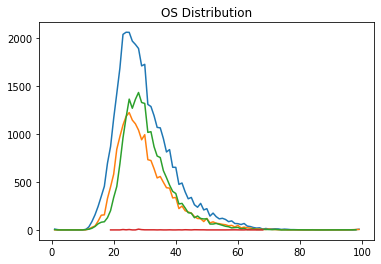

In [277]:
age_os = [
    [x, y.value] 
    for x, y in zip(data['Age'], data['OpSys'])
    if x is not None and y is not None
]

windows_user = [x[0] for x in age_os if x[1] == 1]
windows_user = np.array([[x, windows_user.count(x)] for x in set(windows_user)])

linux = [x[0] for x in age_os if x[1] == 2]
linux = np.array([[x, linux.count(x)] for x in set(linux)])

macos = [x[0] for x in age_os if x[1] == 3]
macos = np.array([[x, macos.count(x)] for x in set(macos)])

bsd = [x[0] for x in age_os if x[1] == 4]
bsd = np.array([[x, bsd.count(x)] for x in set(bsd)])

age_os = np.array(random.sample(age_os, 1000))

plt.title('OS Distribution')
plt.plot(windows_user[:, 0], windows_user[:, 1])
plt.plot(linux[:, 0], linux[:, 1])
plt.plot(macos[:, 0], macos[:, 1])
plt.plot(bsd[:, 0], bsd[:, 1])

97
0.4502


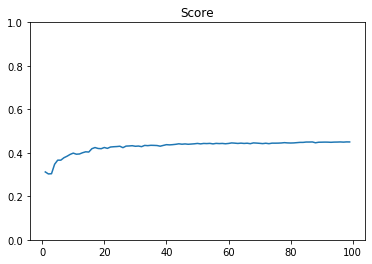

In [308]:
classed_data = [
    [x, y, z]
    for x, y, z in zip(data['Age'], data['Age1stCode'], data['ImpSyn'])
    if x is not None and y is not None and z is not None and y < 100 and x > 18 and x < 80
]

classed_data = np.array(random.sample(classed_data, 20000))

training_data = classed_data[0:10000, :]
validation_data = classed_data[10000:20000, :]

scores = []

ks = range(1,100)

for k in ks:
    clf = KNeighborsClassifier(k)
    clf.fit(training_data[:, :2], training_data[:, 2])

    predict = clf.predict(validation_data[:, :2])

    trues = list(validation_data[:, 2] == predict).count(True)
    scores.append(trues / 10000)

plt.title('Score')
plt.plot(ks, scores)
plt.ylim(0, 1)
print(scores.index(max(scores)))
print(max(scores))

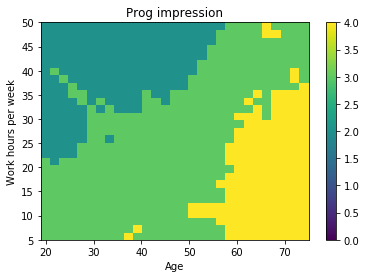

In [309]:
def plot_heat_map(N):
    clf = KNeighborsClassifier(N)
    clf.fit(training_data[:, :2], training_data[:, 2])

    x_min, x_max = training_data[:, 0].min(), training_data[:, 0].max()
    y_min, y_max = training_data[:, 1].min(), training_data[:, 1].max()

    X, Y = np.meshgrid(
        np.linspace(x_min, x_max, 30),
        np.linspace(y_min, y_max, 30)
    )

    Z = clf.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)

    plt.figure()
    plt.title('Prog impression')
    plt.xlabel('Age')
    plt.ylabel('Work hours per week')
    plt.pcolormesh(X, Y, Z, vmin=0, vmax=4)
    plt.colorbar()
    # plt.scatter(training_data[:, 0], training_data[:, 1], c=training_data[:, 2], edgecolor='k', s=20)

plot_heat_map(scores.index(max(scores)))

# plot_heat_map(10)
# plot_heat_map(20)
# plot_heat_map(30)
# plot_heat_map(40)
# plot_heat_map(50)
# plot_heat_map(60)
# plot_heat_map(70)

93
0.3504


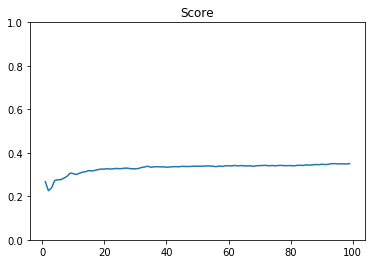

In [310]:
classed_data = [
    [x, y, z]
    for x, y, z in zip(data['ConvertedComp'], data['WorkWeekHrs'], data['JobSat'])
    if x is not None and y is not None and z is not None and x < 100000 and y <100
]

classed_data = np.array(random.sample(classed_data, 20000))

training_data = classed_data[0:10000, :]
validation_data = classed_data[10000:20000, :]

scores = []

ks = range(1,100)

for k in ks:
    clf = KNeighborsClassifier(k)
    clf.fit(training_data[:, :2], training_data[:, 2])

    predict = clf.predict(validation_data[:, :2])

    trues = list(validation_data[:, 2] == predict).count(True)
    scores.append(trues / 10000)

plt.title('Score')
plt.plot(ks, scores)
plt.ylim(0, 1)
print(scores.index(max(scores)))
print(max(scores))

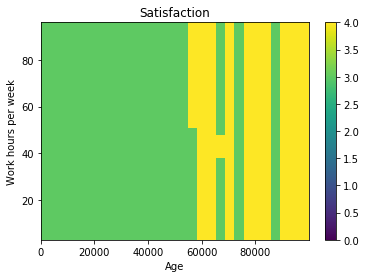

In [311]:
def plot_heat_map(N):
    clf = KNeighborsClassifier(N)
    clf.fit(training_data[:, :2], training_data[:, 2])

    x_min, x_max = training_data[:, 0].min(), training_data[:, 0].max()
    y_min, y_max = training_data[:, 1].min(), training_data[:, 1].max()

    X, Y = np.meshgrid(
        np.linspace(x_min, x_max, 30),
        np.linspace(y_min, y_max, 30)
    )

    Z = clf.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)

    plt.figure()
    plt.title('Satisfaction')
    plt.xlabel('Age')
    plt.ylabel('Work hours per week')
    plt.pcolormesh(X, Y, Z, vmin=0, vmax=4)
    plt.colorbar()
    # plt.scatter(training_data[:, 0], training_data[:, 1], c=training_data[:, 2], edgecolor='k', s=20)

plot_heat_map(scores.index(max(scores)))

# plot_heat_map(10)
# plot_heat_map(20)
# plot_heat_map(30)
# plot_heat_map(40)
# plot_heat_map(50)
# plot_heat_map(60)
# plot_heat_map(70)